In [1]:
pwd

'C:\\Users\\test20\\lab4'

In [2]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules


In [22]:
import pandas as pd
df=pd.read_csv("online_food_transactions.csv")
print(df)


    TID                                      Items
0     1              Idli,Ice Cream,Samosa,Paratha
1     2         Pizza,Fries,Coke,Tea,Juice,Biryani
2     3               Burger,Biryani,Samosa,Paneer
3     4       Pepsi,Tea,Sandwich,Pizza,Dosa,Burger
4     5                          Pepsi,Coffee,Coke
5     6   Pasta,Salad,Coffee,Paratha,Juice,Biryani
6     7               Biryani,Noodles,Pizza,Paneer
7     8              Sandwich,Biryani,Coffee,Juice
8     9                   Salad,Biryani,Pepsi,Idli
9    10                         Coke,Fries,Biryani
10   11                         Pizza,Pasta,Paneer
11   12            Pizza,Pasta,Biryani,Paneer,Coke
12   13               Idli,Ice Cream,Noodles,Pizza
13   14                  Tea,Idli,Coffee,Coke,Cake
14   15  Biryani,Coke,Coffee,Paratha,Samosa,Burger
15   16                      Pasta,Juice,Dosa,Idli
16   17                 Salad,Fries,Paneer,Noodles
17   18    Paratha,Juice,Samosa,Tea,Sandwich,Pizza
18   19                       C

In [23]:
df.head(5)

,TID,Items
0,1,"Idli,Ice Cream,Samosa,Paratha"
1,2,"Pizza,Fries,Coke,Tea,Juice,Biryani"
2,3,"Burger,Biryani,Samosa,Paneer"
3,4,"Pepsi,Tea,Sandwich,Pizza,Dosa,Burger"
4,5,"Pepsi,Coffee,Coke"


## step1 Group Items by Transaction

In [6]:
transactions = df['Items'].apply(lambda x :x.split(",")).tolist()
print(transactions)

[['Idli', 'Ice Cream', 'Samosa', 'Paratha'], ['Pizza', 'Fries', 'Coke', 'Tea', 'Juice', 'Biryani'], ['Burger', 'Biryani', 'Samosa', 'Paneer'], ['Pepsi', 'Tea', 'Sandwich', 'Pizza', 'Dosa', 'Burger'], ['Pepsi', 'Coffee', 'Coke'], ['Pasta', 'Salad', 'Coffee', 'Paratha', 'Juice', 'Biryani'], ['Biryani', 'Noodles', 'Pizza', 'Paneer'], ['Sandwich', 'Biryani', 'Coffee', 'Juice'], ['Salad', 'Biryani', 'Pepsi', 'Idli'], ['Coke', 'Fries', 'Biryani'], ['Pizza', 'Pasta', 'Paneer'], ['Pizza', 'Pasta', 'Biryani', 'Paneer', 'Coke'], ['Idli', 'Ice Cream', 'Noodles', 'Pizza'], ['Tea', 'Idli', 'Coffee', 'Coke', 'Cake'], ['Biryani', 'Coke', 'Coffee', 'Paratha', 'Samosa', 'Burger'], ['Pasta', 'Juice', 'Dosa', 'Idli'], ['Salad', 'Fries', 'Paneer', 'Noodles'], ['Paratha', 'Juice', 'Samosa', 'Tea', 'Sandwich', 'Pizza'], ['Cake', 'Pizza', 'Juice', 'Tea'], ['Coffee', 'Pizza', 'Paneer'], ['Salad', 'Fries', 'Samosa', 'Cake', 'Pasta', 'Tea'], ['Idli', 'Fries', 'Cake'], ['Pizza', 'Pepsi', 'Biryani'], ['Coffee', '

## step2 one hot encoding to transform data in True/Falset

In [24]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_array=te.fit(transactions).transform(transactions)
df_encoded=pd.DataFrame(te_array,columns=te.columns_)

## step3  Apriori Algorithm

In [25]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df_encoded,min_support=0.01,use_colnames=True)
print("Total Frequent Itemsets:",frequent_itemsets.shape[0])



Total Frequent Itemsets: 881


## step4 Visualize most popular items

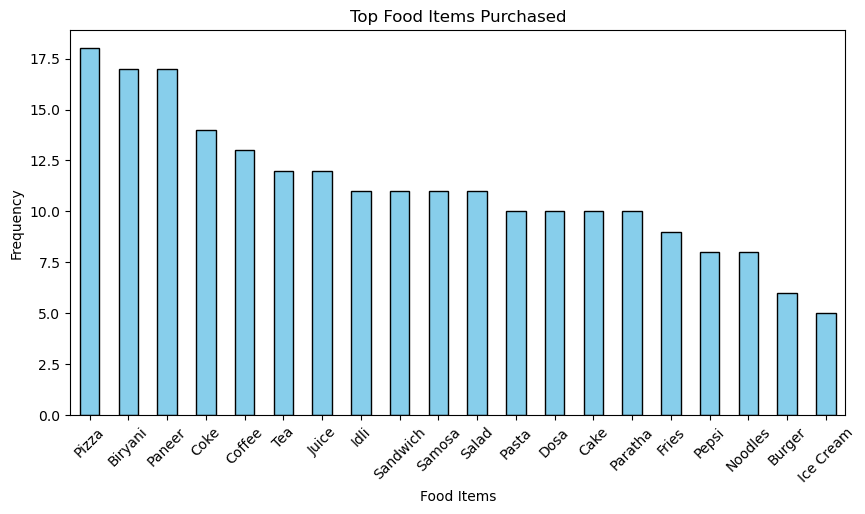

In [26]:
import matplotlib.pyplot as plt
all_items=[item for sublist in transactions for item in sublist]
item_counts=pd.Series(all_items).value_counts()
plt.figure(figsize=(10,5))
item_counts.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("Top Food Items Purchased")
plt.xlabel("Food Items")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


## step 5  Association Generate Association Rules 

In [15]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x)>=1)& rules['consequents'].apply(lambda x: len(x)>=1)]
print("association rules",rules.shape[0])
rules[['antecedents','consequents','support','confidence','lift']].head(5)


association rules 7097


,antecedents,consequents,support,confidence,lift
0,(Biryani),(Burger),0.04,0.117647,0.980392
1,(Burger),(Biryani),0.04,0.333333,0.980392
2,(Biryani),(Cake),0.04,0.117647,0.588235
3,(Cake),(Biryani),0.04,0.200000,0.588235
4,(Biryani),(Coffee),0.06,0.176471,0.678733


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
import pandas as pd
df=pd.read_csv("cancer_data.csv")
print(df)
df.head()

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [40]:
df.drop(['id','Unnamed: 32'],axis=1, inplace=True)
df ['diagnosis']=df ['diagnosis'].map({'M': 1, 'B': 0})
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [50]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(x)
print(scaled_data)

[[ 1.49840276  2.18740483]
 [-1.32895654  1.07611204]
 [ 0.01385565  1.63656457]
 ...
 [-0.66695383  0.55660782]
 [ 1.47917368  2.5312873 ]
 [-0.69550505 -1.36103813]]


In [53]:
pca = PCA(n_components=2)
x_pca=pca.fit_transform(scaled_data)
print(x_pca[:2])

[[ 1.49840276  2.18740483]
 [-1.32895654  1.07611204]]
